# Amphi 8 - Classification [2] - Multiclass Classification. Regularization. Evaluation

# 1. Multiclass Classification.

Introduction

In binary classification, the objective is to classify data points into 2 categories.

In multiclass classification, the objective is to classify them into $K$ categories. In this case we can write $\mathcal Y = \{0, 1, \ldots, K-1\}$.

In this section, we learn several strategies to solve multiclass classification problem.


## 1.1 One vs Rest

In One Vs Rest (OVR) method (also named OVA- One Vs All), we divide our porblem into $K$ binary classification problems. For each problem $k$ ($k = 0$ to $K-1$), we try to predict whether the data point is more likely to be in category $k$ or not in category $k$. In other words, we try to find $K-1$ predictive hypothesis $y^{(0)}, \ldots, y^{(K-1)}$ for those $K$ binary classifications problems. This predictive hypothesis (recall that it is a function) is usually expressed in probability form ($P(y|\mathbf x)$). Finally, we choose the category that maximizes this function.

In probabilistic form:

$$
y^{(0)}(\mathbf x) = P_0(y = 1_0 | \mathbf x) \\
y^{(1)}(\mathbf x) = P_1(y = 1_1 | \mathbf x) \\
\ldots \\
y^{(K-1)}(\mathbf x) = P_{K-1}(y = 1_{K-1} | \mathbf x) \\
$$

Decide $y(\mathbf x) = \arg \max_k y^{(k)}(x)$

where $P_k(y = 1_k | \mathbf x)$ means the probability of $y = 1_k$ given $\mathbf x$ in the $k^{th}$ binary classification problem.



### In Python

Python supports OVA for the following models:

- **sklearn.svm.LinearSVC** (setting multi_class="ovr") (SVM will be presented in next lecture)
- **sklearn.linear_model.LogisticRegression** (setting multi_class="ovr")
- **sklearn.linear_model.LogisticRegressionCV** (setting multi_class="ovr")
- **sklearn.linear_model.Perceptron** ($\arg \max w_k \cdot x$ instead of probability)

**Example**

We use an example in [1] for fruit classification.

In [110]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('fruit_data_with_colors.txt', sep = "\t")
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [111]:
data.shape

(59, 7)

In [112]:
data.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [113]:
data['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [114]:
X = data.loc[:, ["mass", "width", "height", "color_score"]]
y = data.loc[:, "fruit_label"]
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Using LogisticRegression**

In [116]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
y_pred = clf.predict_proba(X_test)
y_pred

array([[3.58913538e-01, 5.79678244e-10, 6.41084986e-01, 1.47549370e-06],
       [3.80022675e-01, 1.45205396e-02, 1.80228228e-01, 4.25228557e-01],
       [6.65960497e-02, 8.14078835e-05, 2.00232934e-01, 7.33089609e-01],
       [4.71493119e-01, 2.55799515e-02, 2.29768655e-01, 2.73158275e-01],
       [4.26632738e-01, 2.14316517e-03, 4.82735210e-01, 8.84888869e-02],
       [5.24513071e-01, 2.08005261e-03, 4.54774529e-01, 1.86323474e-02],
       [5.15904203e-01, 6.96963726e-02, 1.01013818e-01, 3.13385606e-01],
       [7.80465248e-02, 1.26764354e-05, 4.10608685e-01, 5.11332113e-01],
       [5.02069160e-01, 1.25641020e-02, 2.85877856e-01, 1.99488882e-01],
       [6.17601418e-01, 7.07567307e-02, 1.72900608e-01, 1.38741242e-01],
       [4.20928359e-01, 4.84431271e-01, 5.66334533e-02, 3.80069164e-02],
       [4.34393487e-01, 2.95626932e-03, 4.80154371e-01, 8.24958735e-02],
       [4.97416822e-01, 8.59337571e-03, 3.31211595e-01, 1.62778207e-01],
       [4.61597704e-01, 1.93976127e-03, 4.19746178e

In [118]:
clf.predict(X_test)

array([3, 4, 4, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3], dtype=int64)

In [119]:
y_test.values

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)

In [120]:
clf.coef_, clf.intercept_

(array([[ 1.35005139e-04,  7.90924593e-01, -7.04427722e-01,
         -3.88166421e-01],
        [-9.46061077e-02,  1.64318922e+00, -3.15227059e-01,
          2.93015193e-01],
        [ 4.90830914e-02, -6.38562401e-01, -5.97765143e-01,
          1.57700706e-01],
        [-5.58379989e-02, -1.32093343e+00,  2.19077744e+00,
         -1.90468678e-01]]),
 array([-0.6376886 ,  0.33012073, -0.02983125, -0.10378818]))

**Using Perceptron**

In [121]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter = 1000)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [122]:
clf.decision_function(X_test)

array([[ 43191.8664,  -1240.0788,  28776.0978, -38699.2622],
       [ 13658.04  ,   -182.215 , -22435.7225,    939.6775],
       [ 10536.842 ,   -390.834 , -20916.471 ,   4026.029 ],
       [ 13972.8092,   -168.8264, -19899.0216,   -597.0016],
       [ 17354.1312,   -318.1704, -13864.3376,  -5092.0176],
       [ 20430.776 ,   -331.652 , -11704.958 ,  -8254.758 ],
       [ 14831.31  ,    -98.635 , -26585.9825,   1466.9175],
       [ 13893.3756,   -517.2102, -13741.7113,  -1090.0513],
       [ 15592.1108,   -213.9236, -19114.5834,  -1909.4034],
       [ 16059.3632,   -121.8494, -22438.4661,  -1333.1461],
       [ 13893.0044,     64.9002, -22275.8237,  -1028.2837],
       [ 17020.4048,   -303.1466, -13434.5279,  -5152.2479],
       [ 16069.7744,   -237.7998, -17829.1237,  -2726.6837],
       [ 17920.8844,   -318.0598, -16400.9037,  -4260.9637],
       [ 19144.2364,   -388.2188, -12241.1222,  -6682.3822]])

In [123]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [124]:
clf.n_iter_

1000

The problem is not linearly separable, perceptron algorithm does not converge. The algorithm's accuracy is very poor.

## 1.2 One vs One

We are working with $K$ class, we can use $K(K-1)/2$ binary classifiers for each pair of categories and find the following predictive hypothesis:

$$
y^{(0,1)}(\mathbf x) = 1 - y^{(1,0)}(\mathbf x) = P_{0, 1}(y = 0_{0,1} | \mathbf x) \\
y^{(0,2)}(\mathbf x) = 1 - y^{(1,2)}(\mathbf x) = P_{0, 2}(y = 0_{0,2} | \mathbf x) \\
\ldots \\
y^{(K-1,K)}(\mathbf x) = 1 - y^{(K,K-1)}(\mathbf x) = P_{K-1}(y = 0_{K-1,K} | \mathbf x) \\
$$

We can replace $P_{i, j}(y = 0_{i,j} | \mathbf x) $ in each line by $\mathbf 1_{i,j}$ if the model is not probabilistic.

Finally, we find $k$ that maximizes:

$$
\sum_{j \neq k} y^{(k, j)}(\mathbf x)
$$

In perfect model, this sum is $K-1$ for the correct class and $\leq K - 2$ for other classes. In case where $\mathbf 1_{i,j}$ is used instead of $P_{i, j}$, this is nothing but majority vote between the $K$ classifiers after a full pairwise classification procedure.

This method is called One vs One (OVO)

**Comparison with OVR**

OVO needs $N(N-1)/2$ classifiers, that is usually longer than OVR (OVA).

However, it can solve some non-linearly separable cases that OVR cannot (case 2 and 3 below)

<img src="F1.png"></img>
<center>Illustration from [2]</center>

### In Python

Python supports OVA for the following models:

- **sklearn.svm.LinearSVC** (setting decision_function_shape = "one_vs_one") (SVM will be presented in next lecture)

In [125]:
from sklearn.svm import SVC
clf = SVC(decision_function_shape = "one_vs_one")
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='one_vs_one', degree=3, gamma='auto',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [126]:
clf.decision_function(X_test)

array([[ 0.59977971,  0.12767047,  0.05004476, -0.57771012, -0.58701971,
        -0.00110858],
       [ 0.70807823,  0.42621142,  0.06759398, -0.58454003, -0.71385522,
        -0.2884136 ],
       [ 0.61053631,  0.15126831, -0.25978597, -0.57766006, -0.72335224,
        -0.33106619],
       [ 0.59977971,  0.10992964,  0.05004472, -0.58520971, -0.58701973,
         0.01663222],
       [ 0.97115902,  0.93707963,  0.88572994, -0.5776601 , -0.61821883,
        -0.07668509],
       [ 0.715493  ,  0.38000495,  0.28220759, -0.57766006, -0.60545543,
        -0.04581568],
       [ 0.59977971, -0.17340517,  0.05004476, -0.70498296, -0.58701971,
         0.29996706],
       [ 0.59977971,  0.12775458,  0.05004476, -0.57767461, -0.58701971,
        -0.00119268],
       [ 1.00029759,  0.02133426,  0.94503665, -0.99183384, -0.69502887,
         0.93229877],
       [ 0.59977971,  0.11102636,  0.05004473, -0.5847461 , -0.58701973,
         0.01553551],
       [ 0.20829651,  0.12778904,  0.05004476, -0.

In [127]:
clf.predict(X_test)

array([1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int64)

In [128]:
y_test.values

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)

## 1.3 Hierarchical Methods

We can combine advantages of OVR and OVO to describe intermediate methods for multiclass classifications. For example: given categories $\{0, 1, \ldots, K-1 = 2^n - 1 \}$ ($K = 2^n$ categories), using OVO is time infeasible while using OVR may yeild to linear inseparability. We can use OVO in a smarter way:

- Classify $\{0, 1, \ldots, 2^{n-1}-1\}$ with $\{ 2^{n-1}, \ldots, 2^n -1 \}$ (first half with second half)
- Then for each half, divide into two smaller halves (quarters) and classify them.

This method reduces the complexity to $K$ instead of $K^2$ in terms of number of binary classifications. The method is called **hierarchical**. The disadvantage is that we do not know if the division into halves can make the problem linearly separable.

We can even improve this complexity to $O(\log K)$, write every $k \in \{0, \ldots, K-1\}$ in binary forms: $xxx\ldots x$ ($n$ digits) and classify by digits. 

Those methods are generally not implemented in scikit learn.

## 1.4 Using Multinomial Distribution

This method will be detailed in section 2.

# 2. Multinomial Distribution and Applications

## 2.1 Introduction

** Binary Distribution tables** (Probabilistic methods)

| Model                 | Probabilistic Model   Representation                                                                                                                                                         |                                 |                                                   |Solution                         |                                        |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------|---------------------------------------------------|----------------------------------|----------------------------------------|
|                       | Probability Distribution                                                                                                                                                                     | Parameters                      | Optimization Problem                              | Solution                         | Decision Rule                          |
| LDA                   | $P(y)$ follow Bernoulli$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma)$,      $(x_i, y_i)$ independent                                                                              | $\pi, \mu_y, \Sigma$            | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |      (section 5)                 | argmax_y $P(y|x)$                      |                                                                    |
| QDA                   | $P(y)$ follow Bernoulli$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma_y)$,      $(x_i, y_i)$ independent                                                                            | $\pi, \mu_y, \Sigma_y$          | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |      (section 6)                 | argmax_y $P(y|x)$                      |                                                                    |
| Logistic Regression   | $P(y|x) = \frac1{1 +   \exp(-w\cdot x - b}$,      $y_i$ independent conditionned on $x_i$                                                                                               | $w, b$                          | ML     $p(y_1, \ldots, y_N| x_1, \ldots, x_N)$    | Iterative methods                | $1_{w \cdot x + b > 0}$, argmax_y $P(y|x)$                      |                                                                    |
| Gaussian Naïve Bayes  | $P(y)$ follows Bernoulli$(\pi)$,        The features $x^{(i)}$ of $x$ are independent,      $p(x^{(i)}|y) $ follows Gaussian$(\mu_y^{(i)}, \Sigma_y^{(i)})$                                  | $\pi, \mu_y^{i}, \sigma_y^{i}$  | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |     (section 9)                 | argmax_y $P(y|x)$                      |                                                                    |
| K Nearest Neighbors   | $P(y) = \frac{N_y}{N}$,      $P(x|y) = \frac{K_y}{N_y}|\mathcal R|$ where $\mathcal R$ a ball containing   $K$ points                                                                        | Not a parametric model.         |  No optimization problem                          |   No optimization problem         | Majority vote     (as $P(y|x) = K_y/K$ |                                                                    |

In the table, we see our probability distribution hypothesis for binary classifiers are of the form 

$$
P(y) \sim \mathrm{Bernoulli}(\pi)
$$

(for LDA, QDA, GNB, KNN). In case of KNN, $\pi = N_1/N$.

or
$$
P(y|x) \sim \mathrm{Bernoulli}(\pi(x))
$$

(for Logistic Regression). In this case, $\pi(x) = w \cdot x$.

Bernoulli distribution is a random binary variable. We would like to generalize this variable to multivalue case. This yields to **multinomial distribution**.

In multinomial distribution, we have a random variable that can get 1 of $K$ values. We will express this random variable as $y = (y_1, y_2, \ldots, y_K)$ where only one coordinate is 1, the others are 0. The probability that the coordinate $k$ is 1 is $\pi_k$. Let $\mathbf \pi = (\pi_1, \ldots, \pi_K)$. Then:

$$
p(\mathbf y) = \prod_{k=1}^K \pi_k^{y_k} 
$$

where $\sum_k \pi_k = 1$.

Now suppose $y$ or $y|x$ follows multinomial distribution of parameter $\mathbf \pi$, we can generalize probabilistic multiclass classification models from binary ones.

## 2.2 Applications

### 2.2.1 LDA

In multiclass classification, the hypothesis of LDA for prior distribution of categories $\mathcal C_1, \ldots, \mathcal C_K$ is:

$$
\mathbf P(\mathcal C_k) = \mathbf P(y = (0, \ldots, 0, 1, 0, \ldots, 0)) = \pi_k
$$

(1 at $k^{th}$ position(

or equivalently

$$
\mathbf P(y) = \prod_{k=1}^K \pi_k^{y_{(k)}} 
$$

The probability distribution $p(x | \mathcal C_k)$ still follow Gaussian distribution ($\mu_k, \Sigma$):

$$
p(\mathbf x|\mathcal C_k) = \mathcal N (\mathbf x_i | \mu_k, \Sigma)
$$

or equivalently
$$
p(\mathbf x|y) = \prod_{k=1}^K \left( \mathcal N (\mathbf x_i | \mu_k, \Sigma) \right)^{y_k}
$$

The observations are iid, so:

$$
p(\mathbf x_1, \ldots, \mathbf x_N, y_1, \ldots, y_N) = \prod_{i=1}^{N} \prod_{k=1}^{K}  \left[ \pi_k \delta_1 \mathcal N (\mathbf x_i | \mu_k, \Sigma)\right]^{y_{i,k}} 
$$

where $\pi_1, \ldots, \pi_k$.

The negative log likelihood is now

$$
L(\pi_1, \ldots, \pi_K, \mu_0, \ldots, \mu_K) = -\sum_{i=1}^N \sum_{k=1}^K (y_{i,k}\log \pi_k + y_{i,k} \log \mathcal N(\mathbf x_i | \mu_k, \Sigma))
$$

where $\sum_{k=1}^K \pi_k = 1$.

Maximum likelihood solution of $L$ for $\pi_k, \mu_k, \Sigma$ ($k=1, \ldots, K$) can be obtained similarly:

$$
\pi_k = \frac{N_k}N
$$

$$
\mu_k = \frac1{N_k}\sum_{\mathcal C_k} \mathbf x_i
$$

for $k = 1, \ldots, K$,

and

$$
\Sigma = \sum_k \frac{N_k}N S_k
$$

where 
$$
S_k = \frac1{N_k} \sum_{\mathcal C_k} (\mathbf x_i - \mu_k)(\mathbf x_i - \mu_k)^t, \qquad k = 1, \ldots, K
$$

### 2.2.2 QDA

QDA for multiclass classification is similar to LDA, but do not share the same covariance matrix. So the hypothesis is:

$$
\mathbf P(y) = \prod_{k=1}^K \pi_k^{y_{(k)}} 
$$

$$
p(\mathbf x|y) = \prod_{k=1}^K \left( \mathcal N (\mathbf x_i | \mu_k, \Sigma_k) \right)^{y_k}
$$

We want to maximize
$$
p(\mathbf x_1, \ldots, \mathbf x_N, y_1, \ldots, y_N) = \prod_{i=1}^{N} \prod_{k=1}^{K}  \left[ \pi_k \delta_1 \mathcal N (\mathbf x_i | \mu_k, \Sigma)\right]^{y_{i,k}} 
$$

The solution is:
$$
\pi_k = \frac{N_k}N
$$

$$
\mu_k = \frac1{N_k}\sum_{\mathcal C_k} \mathbf x_i
$$

$$
\Sigma_k = \frac1{N_k} \sum_{\mathcal C_k} (\mathbf x_i - \mu_k)(\mathbf x_i - \mu_k)^t
$$

for $k = 1, \ldots, K$.

### 2.2.3 Gaussian Naive Bayes

Gaussian Naive Bayes is QDA where features of $\mathbf x$ are mutually independent.

The hypothesis is:
$$
\mathbf P(y) = \prod_{k=1}^K \pi_k^{y_{(k)}}
$$

For each feature $i$ of $\mathbf x = (x^{(1)}, \ldots, x^{(D)})$.
$$
P(x^{(i)} | y = \mathcal C_k, x^{(1)}, \dots, x^{({i-1})}, x^{({i+1})}, \dots, x^{(D)}) = P(x^{(i)} | \mathcal C_k)  = \frac{1}{\sqrt{2\pi\sigma^2_k}} \exp\left(-\frac{(x^{(i)} - \mu_k)^2}{2\sigma^2_k}\right)
$$

We maximize:
$$
\prod_{n=1}^N \prod_{k=1}^K \left( p(y_{n,k}) \prod_{i=1}^{D} p(x_n^{(i)} \mid y_{n,k}) \right)
$$

The solution is:

$$
\pi_k = \frac{N_k}N
$$

$$
\mu_k = \frac1{N_k}\sum_{\mathcal C_k} \mathbf x_i
$$

$$
(\sigma_k^{(i)}) ^{2}= \frac {1}{|\mathcal C_k|} \sum _{y_n = k}\left( x_n^{(i)} -\mu_k^{(i)} \right)^2 
$$

for $k = 1, \ldots, K$.

### 2.2.4 K-Nearest Neighbors

Nothing changes wrt binary case. We still deduce the rule of majority vote.

$$
y = \arg\max_k \frac{K_k}K
$$

### 2.2.5 Logistic Regression

In multiclass classification, we suppose each class correspond to a vector $\mathbf w_{(k)}$, $y | \mathbf x$ follows:

$$
p(y|\mathbf x) = \frac{\exp(\mathbf w_{(k)} \cdot \mathbf x)}{\sum_{j=1}^K \exp(\mathbf w_{(j)} \cdot \mathbf x)}
$$

By iid hypothesis,

$$
p(y_1, \ldots, y_N | \mathbf x_1, \ldots, \mathbf x_N) = \prod_{n=1}^N \prod_{k=1}^K p(\mathcal C_k | \mathbf x_n)^{y_{(n,k)}}
$$

This optimization is again, solved by iterative methods.

### 2.2.6 Summary

** Multiclass Classification models** (Probabilistic methods)

| Model                 | Probabilistic Model   Representation                                                                                                                                                         |                                 |                                                   |Solution                         |                                        |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------|---------------------------------------------------|----------------------------------|----------------------------------------|
|                       | Probability Distribution                                                                                                                                                                     | Parameters                      | Optimization Problem                              | Solution                         | Decision Rule                          |
| LDA                   | $P(y)$ follow Multinomial$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma)$,      $(x_i, y_i)$ independent                                                                              | $\pi, \mu_y, \Sigma$            | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |      (section 5)                 | argmax_y $P(y|x)$                      |                                                                    |
| QDA                   | $P(y)$ follow Multinomial$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma_y)$,      $(x_i, y_i)$ independent                                                                            | $\pi, \mu_y, \Sigma_y$          | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |      (section 6)                 | argmax_y $P(y|x)$                      |                                                                    |
| Logistic Regression   | $P(\mathcal C_k|x) = \frac{\exp(-w_{(k)}\cdot x - b_k)}{\sum_j   \exp(-w_{(j)}\cdot x - b_j})$,      $y_i$ independent conditionned on $x_i$                                                                                               | $w, b$                          | ML     $p(y_1, \ldots, y_N| x_1, \ldots, x_N)$    | Iterative methods                | $1_{w \cdot x + b > 0}$, argmax_y $P(y|x)$                      |                                                                    |
| Gaussian Naïve Bayes  | $P(y)$ follows Bernoulli$(\pi)$,        The features $x^{(i)}$ of $x$ are independent,      $p(x^{(i)}|y) $ follows Gaussian$(\mu_y^{(i)}, \Sigma_y^{(i)})$                                  | $\pi, \mu_y^{i}, \sigma_y^{i}$  | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |     (section 9)                 | argmax_y $P(y|x)$                      |                                                                    |
| K Nearest Neighbors   | $P(y) = \frac{N_y}{N}$,      $P(x|y) = \frac{K_y}{N_y}|\mathcal R|$ where $\mathcal R$ a ball containing   $K$ points                                                                        | Not a parametric model.         |  No optimization problem                          |   No optimization problem         | Majority vote     (as $P(y|x) = K_y/K$ |                                                                    |

## 2.3 Implementation in Python

Methods based on multinomial distribution are implemented in many classes of scikit learn, including:

- **sklearn.naive_bayes.GaussianNB**
- **sklearn.neighbors.KNeighborsClassifier**
- **sklearn.discriminant_analysis.LinearDiscriminantAnalysis**
- **sklearn.svm.LinearSVC** (setting multi_class=”crammer_singer”)
- **sklearn.linear_model.LogisticRegression** (setting multi_class='multinomial')
- **sklearn.linear_model.LogisticRegressionCV** (setting multi_class='multinomial')
- **sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis**

**Examples**

**LDA**

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [130]:
clf.predict_proba(X_test)

array([[4.73268973e-01, 5.01315461e-07, 5.26730526e-01, 3.39960053e-11],
       [2.52863395e-01, 4.76790741e-09, 7.46123283e-01, 1.01331738e-03],
       [2.41348548e-07, 3.11014272e-21, 2.15035414e-03, 9.97849405e-01],
       [6.96744300e-02, 9.97879282e-06, 9.27388285e-01, 2.92730665e-03],
       [4.30177654e-01, 2.68249342e-06, 5.69819638e-01, 2.53215010e-08],
       [1.43999671e-01, 1.37561459e-05, 8.55875888e-01, 1.10684110e-04],
       [7.95990565e-01, 2.25132079e-09, 2.04009422e-01, 1.01315202e-08],
       [1.99438885e-07, 9.10404389e-20, 4.60877060e-03, 9.95391030e-01],
       [4.02143431e-01, 4.40021081e-07, 5.97851099e-01, 5.02948690e-06],
       [6.14979825e-01, 2.78517161e-05, 3.84992323e-01, 1.51158263e-11],
       [3.50845231e-01, 5.18565037e-01, 1.30589732e-01, 1.21752774e-11],
       [3.48429371e-01, 4.94119567e-05, 6.51521191e-01, 2.64027786e-08],
       [3.51780578e-01, 6.99214146e-07, 6.48214725e-01, 3.99792170e-06],
       [5.45943207e-01, 1.64429460e-09, 4.54055935e

In [131]:
clf.predict(X_test)

array([3, 3, 4, 3, 3, 3, 1, 4, 3, 1, 2, 3, 3, 1, 3], dtype=int64)

In [132]:
y_test.values

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)

In [133]:
clf.priors_

array([0.34090909, 0.09090909, 0.25      , 0.31818182])

In [134]:
clf.means_

array([[165.46666667,   7.53333333,   7.35333333,   0.77133333],
       [ 80.5       ,   5.925     ,   4.325     ,   0.7975    ],
       [200.54545455,   7.57272727,   7.95454545,   0.78090909],
       [142.14285714,   6.40714286,   8.65714286,   0.72      ]])

In [135]:
clf.covariance_

array([[ 1.68170852e+03,  1.98174095e+01,  2.10894343e+01,
        -3.47495179e-01],
       [ 1.98174095e+01,  2.88453119e-01,  2.61624606e-01,
        -1.20714532e-02],
       [ 2.10894343e+01,  2.61624606e-01,  4.54236177e-01,
        -3.09573003e-05],
       [-3.47495179e-01, -1.20714532e-02, -3.09573003e-05,
         4.64407369e-03]])

### Logistic Regression

In [136]:
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
clf.predict_proba(X_test)

array([[6.40401567e-02, 2.54059122e-44, 9.35959544e-01, 2.99235568e-07],
       [3.89555579e-01, 2.31945812e-08, 2.51903333e-01, 3.58541065e-01],
       [1.20984203e-02, 5.54873835e-16, 6.65254968e-02, 9.21376083e-01],
       [4.85879965e-01, 8.74577979e-07, 3.48158131e-01, 1.65961029e-01],
       [4.29194950e-01, 4.96749084e-12, 5.19309721e-01, 5.14953285e-02],
       [5.76125005e-01, 6.96345625e-13, 4.13414726e-01, 1.04602697e-02],
       [6.29053874e-01, 3.59889539e-07, 1.22632456e-01, 2.48313310e-01],
       [3.96475630e-02, 3.88614907e-19, 3.69113689e-01, 5.91238748e-01],
       [5.32414134e-01, 4.68581893e-09, 3.42163311e-01, 1.25422551e-01],
       [7.43017798e-01, 6.25793660e-07, 1.80320537e-01, 7.66610392e-02],
       [2.53069628e-03, 9.97020299e-01, 4.01908227e-04, 4.70961517e-05],
       [4.20981119e-01, 4.30991847e-11, 5.35999331e-01, 4.30195499e-02],
       [5.19256691e-01, 1.02417983e-09, 3.81604835e-01, 9.91384727e-02],
       [5.06457196e-01, 2.97352334e-13, 4.07042578e

In [138]:
clf.predict(X_test)

array([3, 1, 4, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3], dtype=int64)

In [139]:
y_test.values

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)

# 3. Regularization in Classification

# 4. Evaluation of Classification Models

## 4.1 Confusion matrix. Accuracy

We can represent the number of data points correctly classified by a matrix $M$ where $M_{ij}$ represents the number of points of true class $C_i$ classified as $C_j$. This matrix is called **confusion matrix**.

In [140]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_test.values, y_pred

(array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64),
 array([3, 4, 4, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3], dtype=int64))

In [141]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix")
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[2, 0, 2, 0],
       [0, 1, 0, 0],
       [5, 0, 2, 1],
       [0, 0, 0, 2]], dtype=int64)

The **normalized confusion matrix** is defined by dividing the **confusion matrix** by the total number of data points.

In [142]:
import numpy as np
M = confusion_matrix(y_test, y_pred)
normalized_M = M/np.sum(M)
print("Normalized confusion matrix")
normalized_M

Normalized confusion matrix


array([[0.13333333, 0.        , 0.13333333, 0.        ],
       [0.        , 0.06666667, 0.        , 0.        ],
       [0.33333333, 0.        , 0.13333333, 0.06666667],
       [0.        , 0.        , 0.        , 0.13333333]])

The **accuracy** is the number of data points correctly classified. It is the normalized confusion matrix' **trace**.

In [143]:
print("Trace of normalized confusion matrix")
print(sum(np.diagonal(normalized_M)))

from sklearn.metrics import accuracy_score
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Trace of normalized confusion matrix
0.4666666666666667
Accuracy
0.4666666666666667


## 4.2 True Positive/Negative Rate, Precision, Recall, F1 for Binary Classification

### 4.2.1 True Positive, True Negative

In some binary classification problem, we prefer one class than the other and call the former "positive class", the latter "negative class", denoted by 1 and 0 respectively.

Consider the same dataset but now we want to classify into 2 classes: apple and orange(0), mandarin and lemon (1).

In [144]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Data2.txt', sep = "\t")
data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,0,granny_smith,192,8.4,7.3,0.55
1,0,0,granny_smith,180,8.0,6.8,0.59
2,0,0,granny_smith,176,7.4,7.2,0.60
3,1,1,1,86,6.2,4.7,0.80
4,1,1,1,84,6.0,4.6,0.79
5,1,1,1,80,5.8,4.3,0.77
6,1,1,1,80,5.9,4.3,0.81
7,1,1,1,76,5.8,4.0,0.81
8,0,0,braeburn,178,7.1,7.8,0.92
9,0,0,braeburn,172,7.4,7.0,0.89


In [145]:
data.groupby('fruit_label').size()

fruit_label
0    38
1    21
dtype: int64

In [146]:
X = data.loc[:, ["mass", "width", "height", "color_score"]]
y = data.loc[:, "fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_test.values)
print(y_pred)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["0", "1"], columns=["Predicted as 0", "Predicted as 1"])

[0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0]
[0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0]


,Predicted as 0,Predicted as 1
0,19,2
1,3,6


The elements $M_{00}$ is called True Negative

The elements $M_{10}$ is called False Negative

The elements $M_{10}$ is called False Positive

The elements $M_{11}$ is called True Positive

```
TN | FP
__ . __
FN | TP
```

### 4.2.2 True Positive Rate (Recall)

Divide the matrix by sum by **row**, we get True Negative Rate, True Positive Rate, False Negative Rate, False Positive Rate.

In [70]:
M = confusion_matrix(y_test, y_pred)
M_normalized_by_row = M / np.sum(M, axis = 1).reshape((2, 1))
pd.DataFrame(M_normalized_by_row)

,0,1
0,0.904762,0.095238
1,0.333333,0.666667


```
TNR | FPR
___ . ___
FNR | TPR
```

**TPR** is also called **Recall**.

Hence,
$$
TPR = Recall = \frac{TP}{TP + FN}
$$

Evidently $0 \leq TPR \leq 1$. A naive classifier guessing all data points belong to class 1 will have $TPR$ 1 and $FNR$ 0.

### 4.2.3 Precision

Divide the matrix by sum by **columm**, we get another indicator called **Precision**.

In [72]:
M = confusion_matrix(y_test, y_pred)
M_normalized_by_col = M / np.sum(M, axis = 0).reshape((1, 2))
pd.DataFrame(M_normalized_by_col)

,0,1
0,0.863636,0.25
1,0.136364,0.75


```
    | 
___ . _________
    | Precision
```

In other words,
$$
Precision = \frac{TP}{TP + FP}
$$

### 4.2.4 $F_1$ Score

$$
 \frac{2}{F_1} = \frac{1}{Precision} +  \frac{1}{Recall}
$$

or equivalently
$$
F_1 = \frac{2 Precision \cdot Recall}{Precision + Recall}
$$

More generally,
$$
F_{\beta} = (1 + \beta^2) \frac{Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}
$$

Roughly speaking, we can conclude a model is good if:
- It has high recall, high precision
- It has high TPR, TNR
- It has high TPR, low FPR
- It has high $F_1$ (or $F_\beta$) score

In [77]:
from sklearn.metrics import *
print("Recall")
print(recall_score(y_test, y_pred))
print("Precision")
print(precision_score(y_test, y_pred))
print("F1")
print(f1_score(y_test, y_pred))

Recall
0.6666666666666666
Precision
0.75
F1
0.7058823529411765


## 4.3 ROC Curve, ROC AUC for Binary Classification

In some parametric method, we classify $x$ as of class 0 or 1 depending on some learned rule $f(x) < 0$ or $f(x) \geq 0$. This is equivalent to $P(y = 1|x)$ less than or greater than 1/2 in some probabilistic method.

If we replace $0$ and $1/2$ in these decision rule by another number, we will have different prediction, hence change TPR, TNR, precision and recall.

When we represent $FPR, TPR$ on the same graph where our threshold for probabilistic method runs from 0 to 1, we will have different points. They are connected by a "curve" called **Receiver Characteristic Curve** (ROC Curve)

In [87]:
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
print(fpr)
print(tpr) 
print(thresholds)
pd.DataFrame([fpr, tpr, thresholds], index=["FPR", "TPR", "Thresholds"])

[0.         0.         0.0952381  0.0952381  0.14285714 0.14285714
 0.38095238 0.38095238 1.        ]
[0.11111111 0.55555556 0.55555556 0.77777778 0.77777778 0.88888889
 0.88888889 1.         1.        ]
[9.81619588e-01 7.19923154e-01 5.79287912e-01 4.97315906e-01
 4.44425249e-01 4.44419952e-01 2.28812413e-01 2.28226503e-01
 6.37427533e-08]


,0,1,2,3,4,5,6,7,8
FPR,0.000000,0.000000,0.095238,0.095238,0.142857,0.142857,0.380952,0.380952,1.000000e+00
TPR,0.111111,0.555556,0.555556,0.777778,0.777778,0.888889,0.888889,1.000000,1.000000e+00
Thresholds,0.981620,0.719923,0.579288,0.497316,0.444425,0.444420,0.228812,0.228227,6.374275e-08


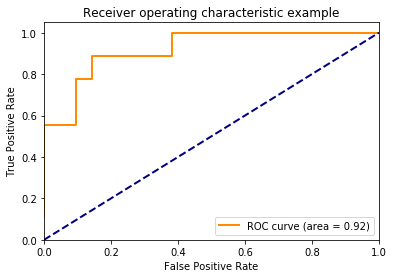

In [88]:
# Code from Mr. Tiep Vu Huu's blog

import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The area under this curve is called AUC (Area Under the Curve). A model is good if this indicator is high.

In [89]:
auc(fpr, tpr)

0.9206349206349207

## 4.4 Micro/macro-average Precision/Recall/F1

<img src="F3.png"></img>

where 
$$
P(A, B) := \frac{\left| A \cap B \right|}{\left|A\right|}
$$

$$
R(A, B) := \frac{\left| A \cap B \right|}{\left|B\right|} 
$$
(Conventions vary on handling $B = \emptyset$; this implementation uses $R(A, B):=0$, and similar for $P$.)
$$
F_\beta(A, B) := \left(1 + \beta^2\right) \frac{P(A, B) \times R(A, B)}{\beta^2 P(A, B) + R(A, B)}
$$

In [96]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('fruit_data_with_colors.txt', sep = "\t")
X = data.loc[:, ["mass", "width", "height", "color_score"]]
y = data.loc[:, "fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

M = confusion_matrix(y_test, y_pred)

In [98]:
sum(np.diagonal(M))/np.sum(M)

0.4666666666666667

In [106]:
print("Micro-average recall")
print(recall_score(y_test, y_pred, average='micro'))
print("Micro-average precision")
print(precision_score(y_test, y_pred, average='micro'))

Micro-average recall
0.4666666666666667
Micro-average precision
0.4666666666666667


In [107]:
print("Macro-average recall")
print(recall_score(y_test, y_pred, average='macro'))
print("Macro-average precision")
print(precision_score(y_test, y_pred, average='macro'))

Macro-average recall
0.5178571428571428
Macro-average precision
0.5438311688311688


D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\Tensorflow3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# References

[1] https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

[2] https://machinelearningcoban.com/2017/02/11/binaryclassifiers/#-binary-classifiers-cho-multi-class-classification-problems

[3] https://machinelearningcoban.com/2017/08/31/evaluation/

[4] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score